<a href="https://colab.research.google.com/github/polock11/Data-Visualization-with-Python/blob/main/Data_Visualization_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topics


*   Correlation
*   Heatmap
*   Time Series Plot

**Data set used**

*   bmw
*   earthquakes
*   co2





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


#Correlation Matrix

*   Positive Corr --> both x and y are increasing  
*   Negative Corr --> both x and y are increasing going on opposite direction 
*   Value is between -1 to +1 means strong negative relation and strong positive relation



In [ ]:
corrrelation_matrix = df.corr()
display(corrrelation_matrix)

,year,price,mileage,mpg,engineSize
year,1.000000,0.623756,-0.774382,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,0.118609,-0.002540
mpg,-0.071762,-0.204882,0.118609,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,-0.399844,1.000000


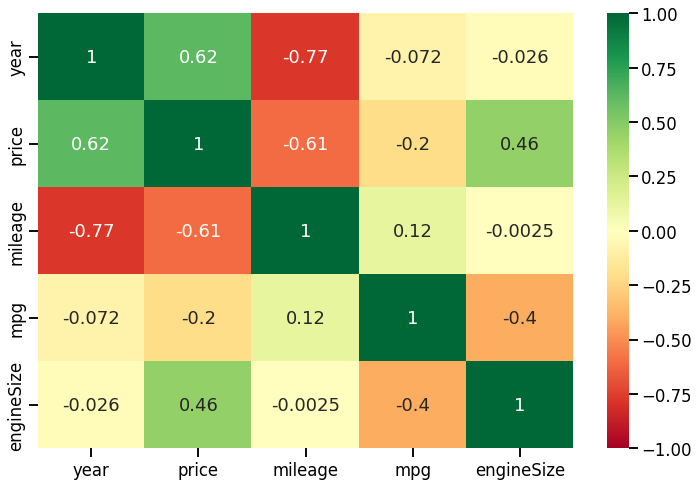

In [ ]:
sns.set_context('talk')
plt.figure(figsize = (12,8))

sns.heatmap(data = corrrelation_matrix, vmin = -1, vmax=1, cmap = 'RdYlGn', annot = True)
plt.show()

#Removing the upper diagonal redundent values 


,year,price,mileage,mpg,engineSize
year,1.000000,0.623756,-0.774382,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,0.118609,-0.002540
mpg,-0.071762,-0.204882,0.118609,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,-0.399844,1.000000


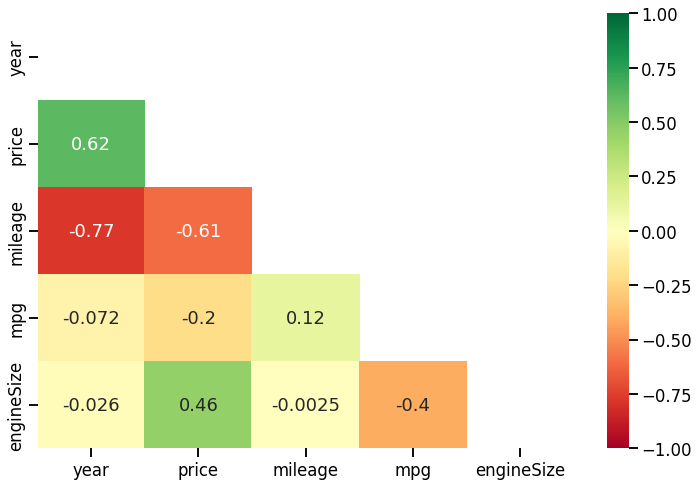

In [ ]:
sns.set_context('talk')
from numpy.lib.twodim_base import triu_indices_from

corrrelation_matrix = df.corr()
display(corrrelation_matrix) 

#taking a zero valu matrix
mask = np.zeros_like(corrrelation_matrix)
#setting the upeer diagonal values = 1
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize = (12,8))

sns.heatmap(data = corrrelation_matrix, vmin = -1, vmax=1, cmap = 'RdYlGn', annot = True, mask = mask)
plt.show()

#Time Series Plot

In [ ]:
df = pd.read_csv('earthquakes.csv')
df.head()

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0


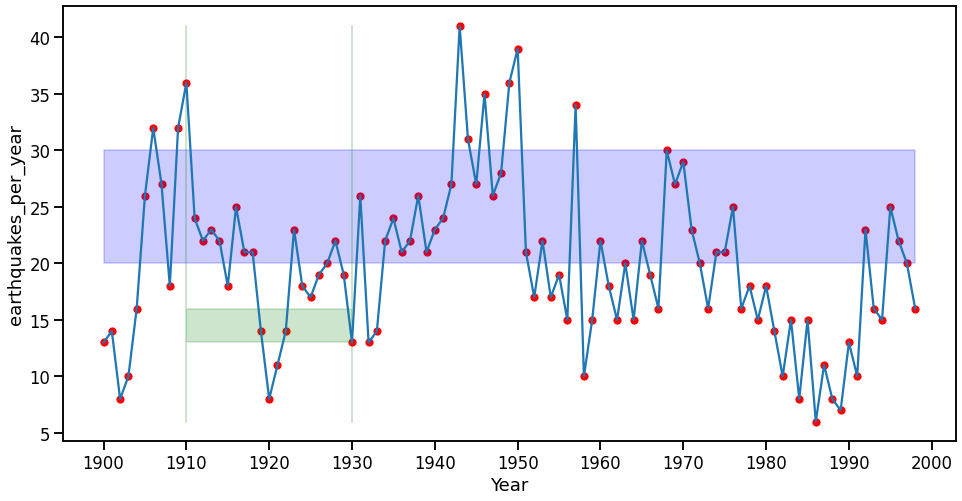

In [ ]:
sns.set_context('talk')
plt.figure(figsize = (16,8))

sns.lineplot(x = "Year", y = "earthquakes_per_year", data = df )
sns.scatterplot(x = "Year", y = "earthquakes_per_year", data = df, color = 'Red')
plt.fill_between(df['Year'], 20, 30, color = 'Blue', alpha = .20)
plt.fill_betweenx(df['earthquakes_per_year'], 1910, 1930, color = 'Green', alpha = .20)
plt.xticks(np.arange(df['Year'].min(), df['Year'].max()+11, 10))
plt.show()

# DateTime Type vs Int type plot

In [ ]:
df = pd.read_csv('co2.csv')

#changing the date time type from object to datetime type 
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,CO2_ppm
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


In [ ]:
display(df.info())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     727 non-null    datetime64[ns]
 1   CO2_ppm  727 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


None

(727, 2)

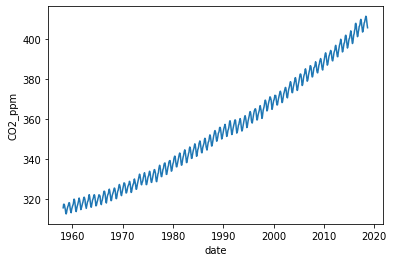

In [ ]:
sns.lineplot(x = 'date', y = 'CO2_ppm', data = df);


#Further Practice

,year,price,mileage,mpg,engineSize
year,1.000000,0.623756,-0.774382,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,0.118609,-0.002540
mpg,-0.071762,-0.204882,0.118609,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,-0.399844,1.000000


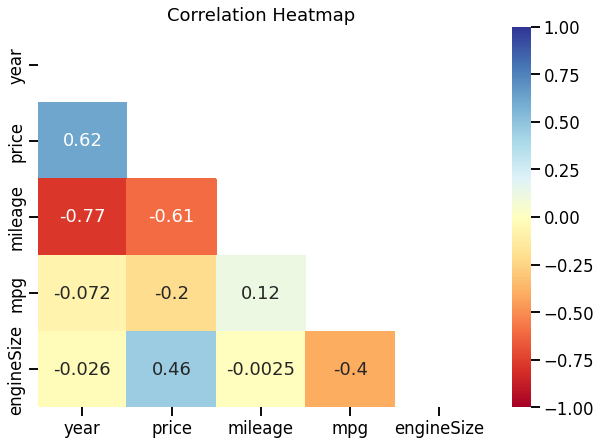

In [ ]:
#heatmap

sns.set_context('talk')
bmw = pd.read_csv('bmw.csv')

corr_matrix = bmw.corr()
display(corr_matrix)

mask =  np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,7))

sns.heatmap(data = corr_matrix, vmin = -1, vmax = 1, cmap = 'RdYlBu', mask = mask, annot = True)
plt.title('Correlation Heatmap')
plt.show()


<function matplotlib.pyplot.show>

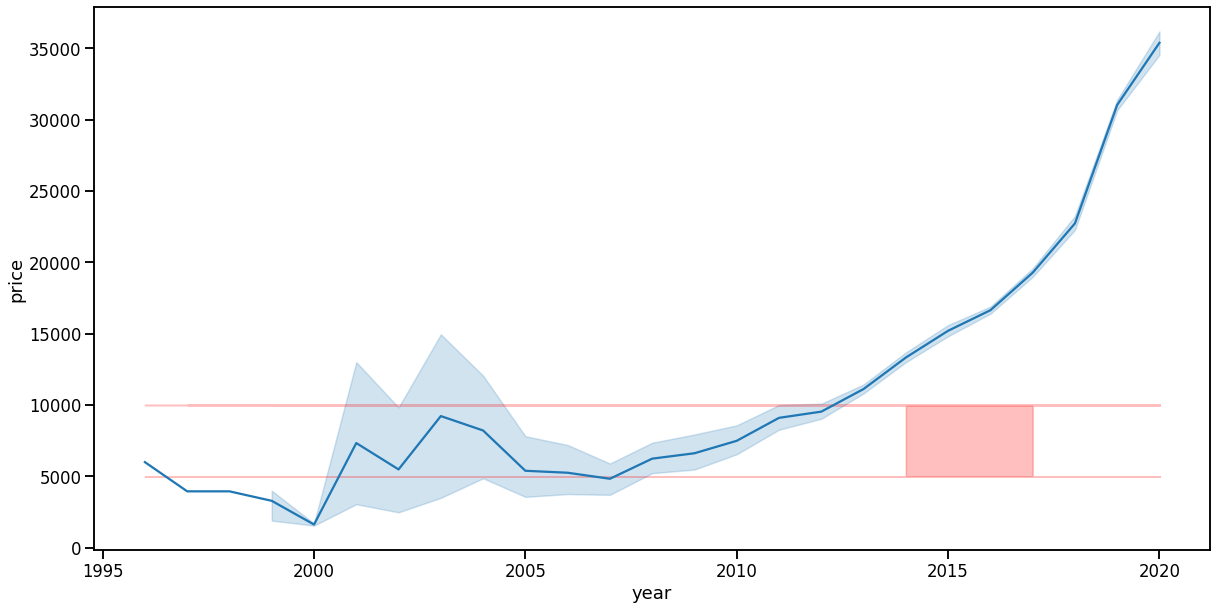

In [ ]:
#time series plot
plt.figure(figsize = (20,10))

sns.lineplot(x = 'year', y = 'price', data = bmw)
plt.fill_between(bmw['year'], 5000,10000, color = 'Red', alpha = .25)

plt.show

In [ ]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


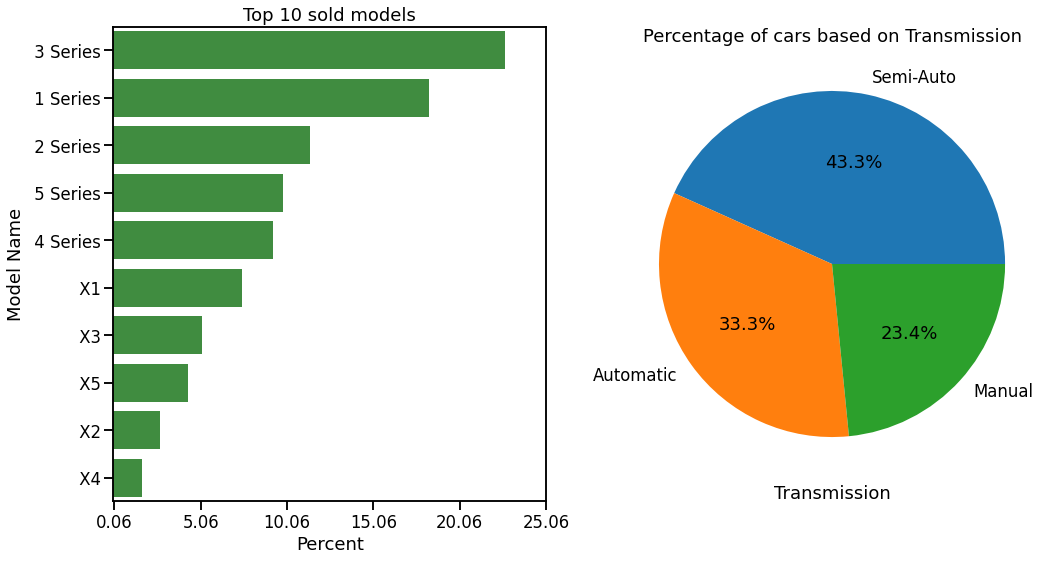

In [ ]:
top_model = pd.DataFrame(bmw['model'].value_counts())
top_model = top_model.reset_index()
top_model = top_model.rename(columns = {'index':'model',
                  'model':'count'})
top_model['percent'] = (top_model['count']/sum(top_model['count'])) * 100
top_model = top_model.round(2) 
top_model.head()

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
sns.barplot(x = 'percent', y = 'model', data = top_model.head(10), color = 'Green', alpha = .80)
plt.xticks(np.arange(top_model['percent'].min(), top_model['percent'].max()+6, 5))
plt.xlabel('Percent')
plt.ylabel("Model Name")
plt.title('Top 10 sold models')

plt.subplot(2,2,2)
bmw['transmission'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%")
plt.xlabel('Transmission')
plt.ylabel("")
plt.title('Percentage of cars based on Transmission')

plt.tight_layout()
plt.show()
